<a href="https://colab.research.google.com/github/alfondace/ISYS5002/blob/main/10_visualise_twitter_Tue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

# Twitter Tweet Analysis

## Workflow
1. Install Packages
2. Get data
3. Visually perform sentiment analysis
  * plot number of positive, negative, neutral tweets each day
  * plot the proportion of postive, negative, neutral tweets
  * create a word cloud from the tweets

## 1. Install packges

In [ ]:
from google.colab import output
!pip install snscrape
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/tweets.py
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
!pip install TextBlob
!pip install WordCLoud
output.clear()
print("Required packages installed")

Required packages installed


## 2. Get the Data

In [ ]:
from tweets import tweets_to_df
help(tweets_to_df)

Help on function tweets_to_df in module tweets:

tweets_to_df(what, since='2022-01-01', until='2022-01-31', max_tweets=500)
    Performs a simple term based search of twitter tweets to get
    the date and message of the tweet.
    
    Parameters
    ----------
    what: str
      The search term
    since: str, YYYY-MM-DD, optional
      The date to start search from (default 2022-01-01)
    until: str, YYYY-MM-DD, optional
      The date to search to (default 2022-01-31)
    max_tweets: int, optional
      The maximum number of tweets to return (default 500)
    
    Returns
    -------
    Pandas Dataframe of date and the tweet message.  The message has
    been *cleaned* to remove emojis and non english letters.



In [ ]:
# Run tweets_to_df()) method.  Your choice of keyword
search_term = input("Please enter a term to search for: ")
tweets_df = tweets_to_df(search_term)

tweets_df



Please enter a term to search for: Curtin


,Date,Clean Text
0,2022-01-30,I dont think he would take it yet but Jim Curtin
1,2022-01-30,If they were to fire Gregg my pick would be Cu...
2,2022-01-30,Meanwell curtin You did tweet the work on the ...
3,2022-01-30,mi What are you talking about McConnell s fear...
4,2022-01-30,A recent BSRG survey of migrants from South As...
...,...,...
495,2022-01-28,ter um cabelo curtin eu fico tchola
496,2022-01-28,Am I the only one who immediately hears Hoyt C...
497,2022-01-28,Yes homicide is bad but I think you re actuall...
498,2022-01-28,Capital Chemist Curtin 65


## 3. Perform Sentiment Analysis
The sentiment function of textblob returns two properties, polarity, and subjectivity.

See: https://textblob.readthedocs.io/en/dev/index.html

https://twitter-data-analysis.blogspot.com/2020/08/twitter-data-analysis-part-3-sentiment.html

https://monkeylearn.com/blog/sentiment-analysis-examples/



### Polarity
Polarity is float value which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

### Subjectivity
* Subjective sentences generally refer to personal opinion, emotion or judgment.
* Objective refers to factual information. 
* Subjectivity is a float value which lies in the range of [0,1].
* Subjectivity lies between [0.0,1.0].
 * 0.0 is very objective and 1.0 is very subjective.




In [ ]:
from textblob import TextBlob


# Creating a funtion to get the subjectivity.
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

# Creating a function to get the polarity. 
def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment
# Creating two columns to store subjectivity and polarity
tweets_df['Subjectivity'] = tweets_df['Clean Text'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Clean Text'].apply(getPolarity)

tweets_df.head()

,Date,Clean Text,Subjectivity,Polarity
0,2022-01-30,I dont think he would take it yet but Jim Curtin,0.000000,0.000000
1,2022-01-30,If they were to fire Gregg my pick would be Cu...,0.443750,0.287500
2,2022-01-30,Meanwell curtin You did tweet the work on the ...,0.000000,0.000000
3,2022-01-30,mi What are you talking about McConnell s fear...,0.900000,-0.600000
4,2022-01-30,A recent BSRG survey of migrants from South As...,0.320833,0.004167
...,...,...,...,...
495,2022-01-28,ter um cabelo curtin eu fico tchola,0.000000,0.000000
496,2022-01-28,Am I the only one who immediately hears Hoyt C...,1.000000,0.000000
497,2022-01-28,Yes homicide is bad but I think you re actuall...,0.321230,-0.119048
498,2022-01-28,Capital Chemist Curtin 65,0.000000,0.000000



### Plotting a graph with Subjectivity against Polarity




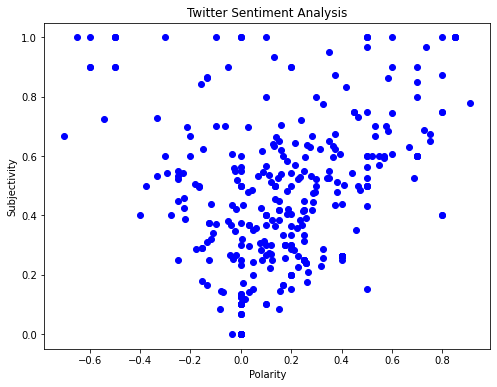

In [ ]:
import matplotlib.pyplot as plt
# Plotting a graph with Subjectivity against Polarity
plt.figure(figsize=(8,6))

for i in range(1, tweets_df.shape[0]):
  plt.scatter(tweets_df["Polarity"][i], tweets_df["Subjectivity"][i], color='Blue')
  
# Labelling axis's and title
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

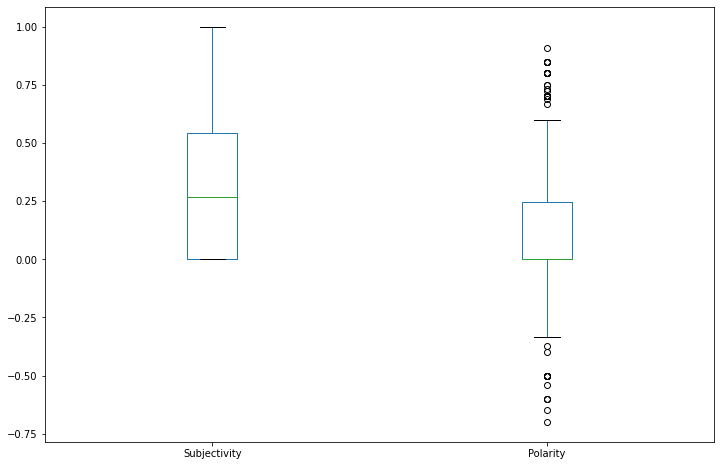

In [ ]:
# Do a box plot of columns Subjectivity and Polarity
tweets_df.boxplot(column=['Subjectivity', 'Polarity'], grid=False, figsize=(12, 8))

# Sentiment over time.

From the documentation, the values of polarity can be interpreted as sentiment.  So we can *calculate* the sentiment of each tweet as either positive, negative or neutral.

> There are more precise ways, keeping it simple for this exercise.

It could be interesting to plot these over time.  So, each day there is a number of tweets, what proportions are positive, negative or neutral.

First let us add a sentiment column


In [ ]:
tweets_df

,Date,Clean Text,Subjectivity,Polarity
0,2022-01-30,I dont think he would take it yet but Jim Curtin,0.000000,0.000000
1,2022-01-30,If they were to fire Gregg my pick would be Cu...,0.443750,0.287500
2,2022-01-30,Meanwell curtin You did tweet the work on the ...,0.000000,0.000000
3,2022-01-30,mi What are you talking about McConnell s fear...,0.900000,-0.600000
4,2022-01-30,A recent BSRG survey of migrants from South As...,0.320833,0.004167
...,...,...,...,...
495,2022-01-28,ter um cabelo curtin eu fico tchola,0.000000,0.000000
496,2022-01-28,Am I the only one who immediately hears Hoyt C...,1.000000,0.000000
497,2022-01-28,Yes homicide is bad but I think you re actuall...,0.321230,-0.119048
498,2022-01-28,Capital Chemist Curtin 65,0.000000,0.000000


In [ ]:
# Deciding whether the tweet is positive, neutral or negative
def sentiment(polarity):
  if polarity > 0:
      return 'Positive'
  elif polarity == 0:
      return 'Neutral'
  else:
      return 'Negative'

In [ ]:
tweets_df.head()

,Date,Clean Text,Subjectivity,Polarity,Sentiment
0,2022-01-30,I dont think he would take it yet but Jim Curtin,0.000000,0.000000,Neutral
1,2022-01-30,If they were to fire Gregg my pick would be Cu...,0.443750,0.287500,Positive
2,2022-01-30,Meanwell curtin You did tweet the work on the ...,0.000000,0.000000,Neutral
3,2022-01-30,mi What are you talking about McConnell s fear...,0.900000,-0.600000,Negative
4,2022-01-30,A recent BSRG survey of migrants from South As...,0.320833,0.004167,Positive


In [ ]:
# Add sentiment column
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentiment)

In [ ]:
# Lets get just the positive tweets
pos = tweets_df[tweets_df['Sentiment'] == 'Positive']
pos

### Write a function to calculate how many each day.  We will write a function because want to do this for negative and netural tweets.

In [ ]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()


In [ ]:
# positive tweets per day
pos_per_day = num_tweets(pos)
pos_per_day


2022-01-28    98
2022-01-29    74
2022-01-30    55
Name: Date, dtype: int64

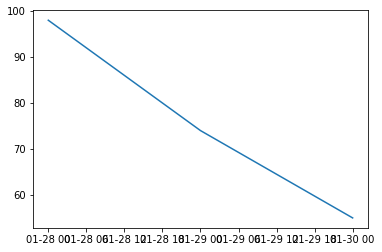

In [ ]:
# Plot the positive tweets per day
pos_per_day.plot()

2022-01-28    33
2022-01-29    21
2022-01-30    18
Name: Date, dtype: int64


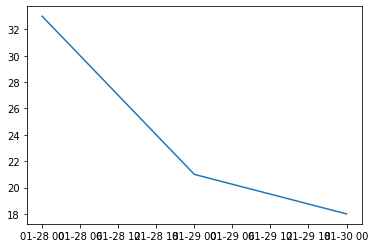

In [ ]:
# Now repeat for negative
neg = tweets_df[tweets_df['Sentiment'] == 'Negative']
neg_per_day = num_tweets(neg)
print(neg_per_day)
neg_per_day.plot()

2022-01-28    73
2022-01-29    71
2022-01-30    57
Name: Date, dtype: int64


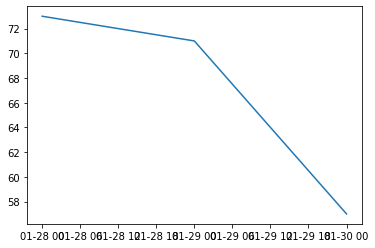

In [ ]:
# repeat for neutral
neu = tweets_df[tweets_df['Sentiment'] == 'Neutral']
neu_per_day = num_tweets(neu)
print(neu_per_day)
neu_per_day.plot()

### Next, we will display the number of positive, negative, or neutral tweets we have and also produce a percentage of each.


In [ ]:
tweets_df.shape[0]

500

In [ ]:
# count the unique rows in the dataframe - returns the total number of rows
tweets_df['Sentiment'].value_counts()

In [ ]:
# Finding percentage of positive tweets
postweets = tweets_df[tweets_df.Sentiment == 'Positive']
postweets = postweets['Clean Text']

#print(postweets)
#print(postweets.shape)
#print(tweets_df.shape)

pos_percentage = round((postweets.shape[0]/tweets_df.shape[0]) * 100, 1)
pos_percentage

45.4

In [ ]:
# Finding percentage of negative tweets
negtweets = tweets_df[tweets_df.Sentiment == 'Negative']
negtweets = negtweets['Clean Text']

#print(negtweets)
#print(negtweets.shape)
#print(tweets_df.shape)

neg_percentage = round((negtweets.shape[0]/tweets_df.shape[0]) * 100, 1)
neg_percentage

14.4

In [ ]:
# Finding percentage of neutral tweets
neutweets = tweets_df[tweets_df.Sentiment == 'Neutral']
neutweets = neutweets['Clean Text']

#print(neutweets)
#print(neutweets.shape)
#print(tweets_df.shape)

neu_percentage = round((neutweets.shape[0]/tweets_df.shape[0]) * 100, 1)
neu_percentage

40.2

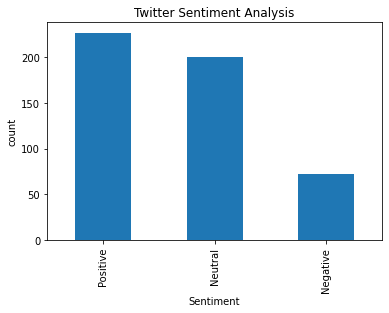

In [ ]:
# Creating a bar chart to visualise the count
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('count')
tweets_df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

How about propotions of sentiment type?

Visit Python Graph Gallery, 'Part of the Whole', select 'Pie' and loot at the example

([<matplotlib.patches.Wedge at 0x7f681071fd90>,
 [Text(0.1584118738527104, 1.0885337285644727, ''),
  Text(-1.0853545464006118, -0.17890083456351516, ''),
  Text(0.333338763618726, -1.048277286155309, '')])

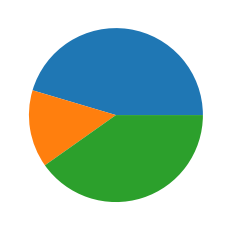

In [ ]:
import matplotlib.pyplot as plt
values = [len(pos),len(neg),len(neu)]
plt.pie(values)

We can do better. 

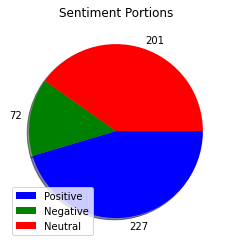

In [ ]:
import matplotlib.pyplot as plt
 
values = [len(pos),len(neg),len(neu)]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['b', 'g', 'r']
plt.pie(values, colors=colors, labels= values,counterclock=False, shadow=True)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

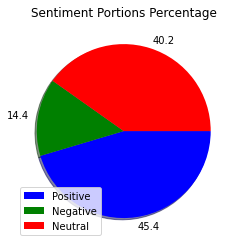

In [ ]:
import matplotlib.pyplot as plt
 
values = [pos_percentage,neg_percentage,neu_percentage]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['b', 'g', 'r']
plt.pie(values, colors=colors, labels= values,counterclock=False, shadow=True)
plt.title('Sentiment Portions Percentage')
plt.legend(labels,loc=3)
plt.show()

#3 WordCLoud

Visit Python Graph Gallery, 'Ranking', select 'Word Cloud' and look at the example

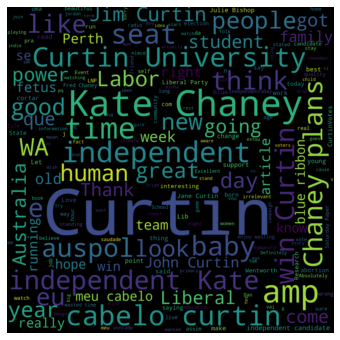

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS

# Get all the messages
# Stores all the words in one string
messages = ' '.join(tweets_df['Clean Text'])

# Create the wordcloud object
wordcloud = WordCloud(width=1480, height=1480, margin=0, stopwords=ENGLISH_STOP_WORDS ).generate(messages)

# Display the generated image:
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()